# Part2 - RADAR Data Visualization and Analysis

In [185]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pyplot as plt
import math
import spectrum as sp
import os

## Overview of RADAR data
Please follow this [link](https://drive.google.com/drive/folders/1vJF8ljsGMV4Nrny7E5y_mmwjWq5oopeH?usp=sharing) to find and download RADAR data that I am going to use in this notebook. This data was originally shared in this [github repositorty](https://github.com/povilasDadelo/Material-classification.git).

This data can used for 2 different applications: 
   1. Object recognition 
   2. Material classification 
In this notebook, I will be only visualizing, transforming and analysing signal from different subforlders.

The data folder contains subfolders for  different objects(Materials). Once you run the below section, you will be requested to prodvide material that you want to visualize its data.


In [186]:
data_path = "/home/issa/Documents/data"
os.chdir(data_path)
material = input("Enter material: ")
material = material.lower()

In [187]:
os.chdir(material)
items_list = os.listdir()
nbr_items = len(items_list)


In [188]:
material_sig_idx = random.randint(1,nbr_items) ;
material_sig = np.load(items_list[material_sig_idx])

## Visualization in time domain

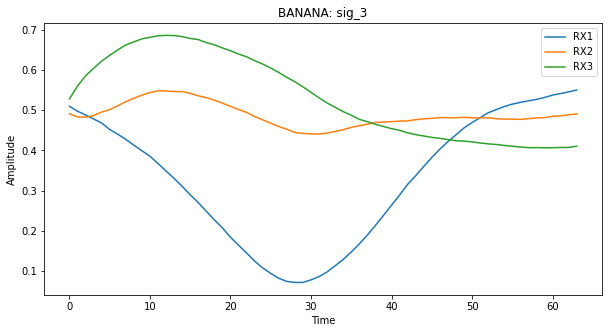

In [189]:
# Randomly select and plot signal for to selected object
plt.figure(figsize = (10,5))
plt.plot(np.transpose(material_sig))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(material.upper() + ': sig_' + str(material_sig_idx))
plt.legend(["RX1", "RX2", "RX3"])
plt.show()

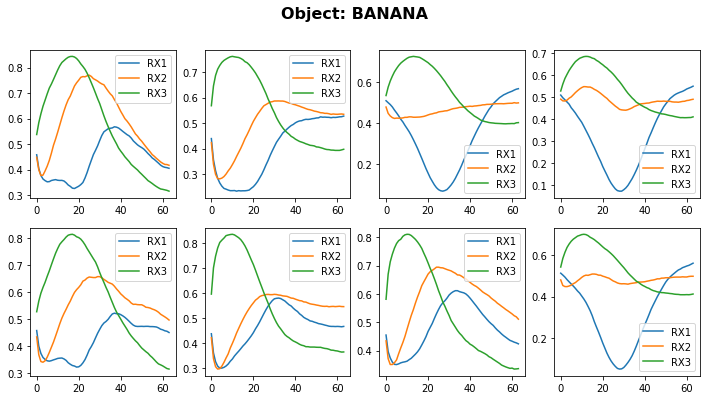

In [190]:
# Plot all the signals in the selected folder 
fig, axs = plt.subplots(2, 4, facecolor = 'w')
fig.set_figheight(6)
fig.set_figwidth(12)
axs = axs.ravel()

for ii in range(nbr_items):
    obj_signal = np.load(items_list[ii])
    axs[ii].plot(np.transpose(obj_signal))
    axs[ii].legend(["RX1", "RX2", "RX3"])
plt.suptitle("Object: " + material.upper(), fontsize = 16, fontweight = 'bold')
plt.show()

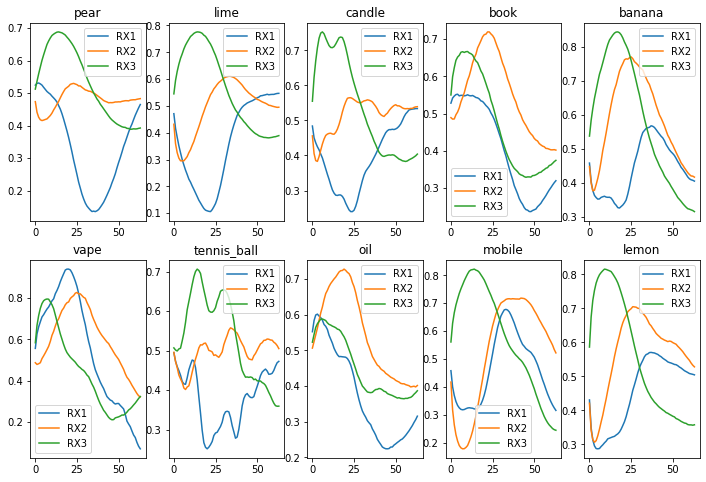

In [196]:
# Change directory to data directoryand list of subfolders names
folders = os.listdir(os.chdir('/home/issa/Documents/data'))
len_fold = len(folders)

# Randomly from each folder get a signal and plot it
fig, axs = plt.subplots(2, round(len_fold/2), facecolor = 'w')
fig.set_figheight(8)
fig.set_figwidth(12)
axs = axs.ravel()

for  fold_idx, folder in enumerate(folders):
    selected_sig  = np.load(folder + '/' + random.choice(os.listdir(os.getcwd()+ '/' + folder)))
    axs[fold_idx].plot(np.transpose(selected_sig))
    axs[fold_idx].set_title(folder)
    axs[fold_idx].legend(["RX1", "RX2", "RX3"])
    
plt.show()

## Spectral Analysis

In [199]:
#  Change directory to the selected material folder
os.chdir(material)
material_sigs = os.listdir()

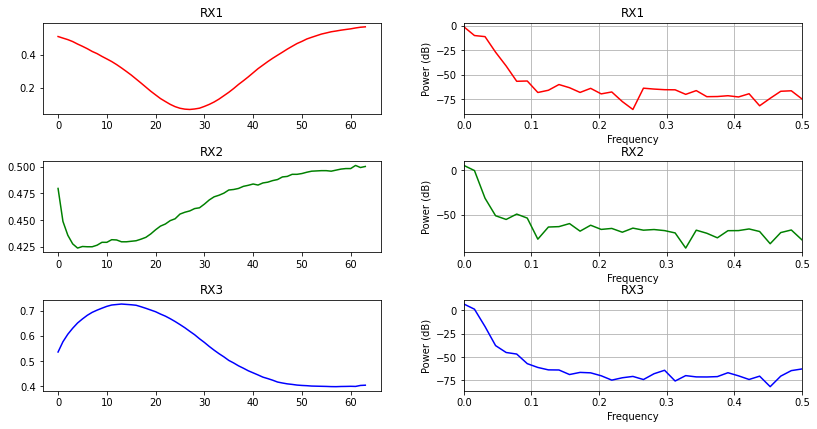

In [200]:
fig, axs = plt.subplots(nrows=3, ncols=2, facecolor = 'w')
fig.tight_layout()
fig.set_figheight(6)
fig.set_figwidth(12)
axs = axs.ravel()
axs[0].plot()
rxs = ["RX1", "RX2", "RX3"]
clr = ["red", "green", "blue"]
sig_rxs = np.transpose(np.load(random.choice(material_sigs)))
for rxIdx, rx in enumerate(rxs):
   axs[2*rxIdx].plot(sig_rxs[:,rxIdx], color = clr[rxIdx])
   axs[2*rxIdx].set_title(rxs[rxIdx])
   
   rx_prdg = sp.Periodogram(sig_rxs[:,rxIdx] )
   rx_prdg.plot(ax=axs[2*rxIdx + 1], color = clr[rxIdx])
   axs[2*rxIdx +1].set_title(rxs[rxIdx])
   

plt.show()

In [198]:
os.chdir('/home/issa/Documents/data')